# Boston Housing Prices

### Introduction

### Project Plan

- Describe the dataset, and investigate the summary statistics for each category (column).
- Identify correlation between different categories by graphing the data. This process will involve a considerable amount of trial and error. I plan to use sns.pairplot to compare categories. 
- Verify that there is correlation between categories identified by graphing, and analyse the relationship between those categories. 
- Analysis and prediction of house prices based on different factors.


### Libraries

In [4]:
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

In [2]:
plt.style.use('classic') #sets the size and style of the charts

### The Dataset

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

- **crim:** per capita crime rate by town.
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town.
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox:** nitrogen oxides concentration (parts per 10 million).
- **rm:** average number of rooms per dwelling.
- **age:** proportion of owner-occupied units built prior to 1940.
- **dis:** weighted mean of distances to five Boston employment centres.
- **rad:** index of accessibility to radial highways.

- **tax:** full-value property-tax rate per \$10000 dollars.
- **ptratio:** pupil-teacher ratio by town.
- **black:** $1000(Bk - 0.63)^{2}$ where Bk is the proportion of blacks by town.
- **lstat:** lower status of the population (percent).
- **medv:** median value of owner-occupied homes in \$1000s.

In [5]:
df = pd.read_csv('data/houses.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The dataset includes continuous and discrete numerical data. Scatter plots will be used to identify possible correlation with continuous variables, while boxplots will be employed when looking at discrete variables. _Note:_ Although the number of rooms in a house is discrete, the dataset includes the average number of rooms, which is a continuous value. 

### Graphing Continuous Data
From graphing different categories alongside median value, I have identified three factors that appear to positively and negatively impact median house prices. 

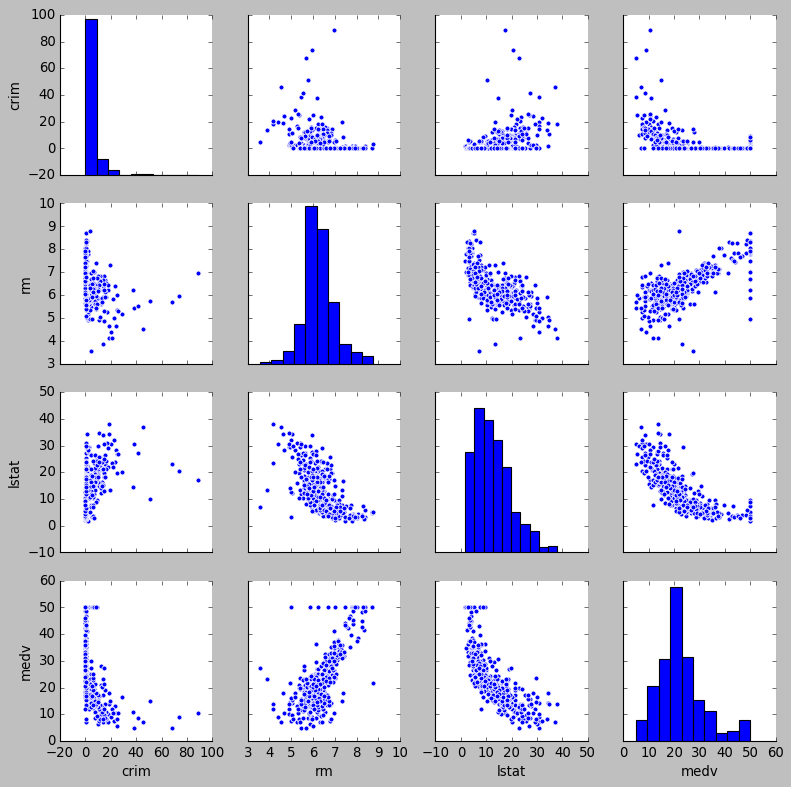

In [4]:
sns.pairplot(df[['crim', 'rm', 'lstat', 'medv']]);

- Properties with a below average value appear to be located in areas with a higher rate of crime, even if we exclude outliers. 
- Properties with an average or above average number of rooms appear are more likely to have a higher median value. 
- Properties in areas with a higher proportion of lower status people appear to have a below average value. 

### Graphing Discrete Data

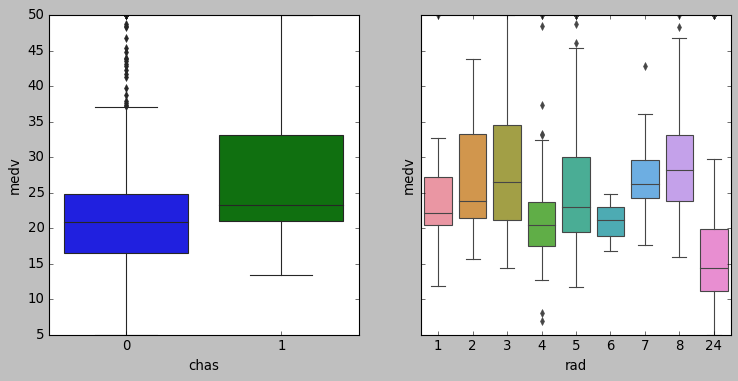

In [5]:
f, axes = plt.subplots(1, 2, figsize = (11, 5), sharey=True)
sns.boxplot(x = 'chas', y = 'medv', data =df, orient='v', ax=axes[0])
sns.boxplot(x = 'rad', y = 'medv', data =df, orient='v', ax=axes[1])
plt.show()

## Identifying Correlation

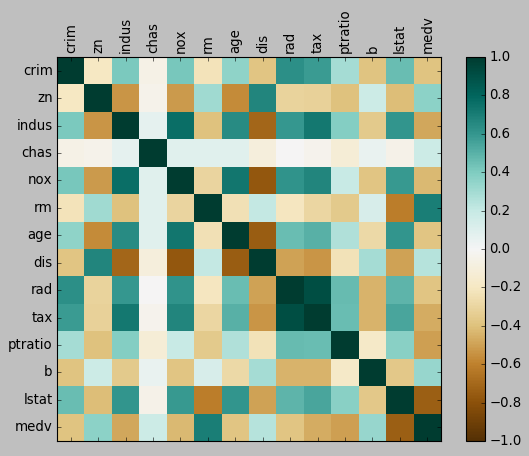

In [16]:
#Adapted from 
#https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
corr = df.corr()#Set corr to be 
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='BrBG', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From the map above, it's obvious that the rm and lstat are good indicators of values, as predicted. This is verified when I calculate the summary statistics.

In [6]:
#Returns table with correlation coefficients for all variables
corr = df.corr(method = 'pearson')
#Return medv column only
corr['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [8]:
corr**2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,0.040188,0.165310,0.003124,0.177217,0.048069,0.124421,0.144149,0.391257,0.339614,0.084068,0.148274,0.207591,0.150780
zn,0.040188,1.000000,0.284973,0.001823,0.266879,0.097338,0.324373,0.441438,0.097311,0.098950,0.153412,0.030807,0.170565,0.129921
indus,0.165310,0.284973,1.000000,0.003961,0.583164,0.153410,0.415739,0.501302,0.354179,0.519495,0.146879,0.127432,0.364574,0.233990
chas,0.003124,0.001823,0.003961,1.000000,0.008318,0.008327,0.007485,0.009836,0.000054,0.001266,0.014766,0.002380,0.002908,0.030716
nox,0.177217,0.266879,0.583164,0.008318,1.000000,0.091318,0.535049,0.591715,0.373860,0.446255,0.035696,0.144438,0.349138,0.182603
rm,0.048069,0.097338,0.153410,0.008327,0.091318,1.000000,0.057727,0.042126,0.044036,0.085292,0.126381,0.016402,0.376761,0.483525
age,0.124421,0.324373,0.415739,0.007485,0.535049,0.057727,1.000000,0.559325,0.207956,0.256497,0.068390,0.074821,0.362812,0.142095
dis,0.144149,0.441438,0.501302,0.009836,0.591715,0.042126,0.559325,1.000000,0.244617,0.285617,0.054043,0.084979,0.247005,0.062464
rad,0.391257,0.097311,0.354179,0.000054,0.373860,0.044036,0.207956,0.244617,1.000000,0.828515,0.215984,0.197503,0.238805,0.145639
tax,0.339614,0.098950,0.519495,0.001266,0.446255,0.085292,0.256497,0.285617,0.828515,1.000000,0.212386,0.195194,0.295929,0.219526


- As expected the average number of rooms positively impacts median house value, with a significant correlation coefficient
- The proportion of the population defined as lower status negatively impacts median house value, and is the most significant factor impacting value. 
- There actually appears to be very little correlation between crime and median house value.
- Indus, nox, tax, and pupil teacher ratio are all have greater evidence of correlation with median house prices, than the proportion of crime in the area.
- That been said they're not as significant as either the number of rooms or status of the population. 
- However the correlation coefficient estimates the linear relationship between variables, and although crime has very little linear correlation with median value, I can still observe a relationship between higher crime rates and lower median value.

However attempts to fit poylnomials of different degrees to this data failed to find any relevant regression.

In [10]:
crime=df['crim']
val=df['medv']

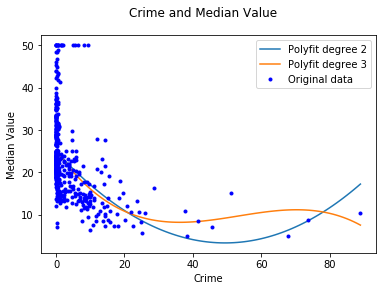

In [13]:
plt.figure()
x = np.arange(90)
[r, s, t] =np.polyfit(crime, val, 2)
y2 = r*x*x +s*x +t
plt.plot(x, y2, label = 'Polyfit degree 2')


[m, n, o, p] =np.polyfit(crime, val, 3)
y3 = m*x*x*x +n*x*x + o*x +p
plt.plot(x, y3, label = 'Polyfit degree 3')



plt.plot(crime, val, 'b.', label = 'Original data')

plt.suptitle('Crime and Median Value')
plt.xlabel('Crime')
plt.ylabel('Median Value')
plt.legend();

 This may be because an exponential regression would best fit the data. But for the moment, I'm going to disregard crime as a factor influencing house values. 

## What adds value to your home?

In [10]:
value = df['medv']*1000
value.describe()

count      506.000000
mean     22532.806324
std       9197.104087
min       5000.000000
25%      17025.000000
50%      21200.000000
75%      25000.000000
max      50000.000000
Name: medv, dtype: float64

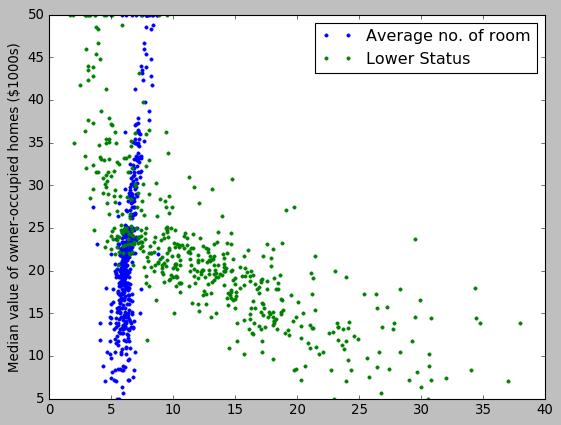

In [11]:
plt.figure(figsize = (8, 6))
plt.ylabel('Median value of owner-occupied homes ($1000s)')
lineObjects = plt.plot(df[['rm', 'lstat']], df['medv'], '.')
plt.legend(iter(lineObjects), ('Average no. of room', 'Lower Status'));

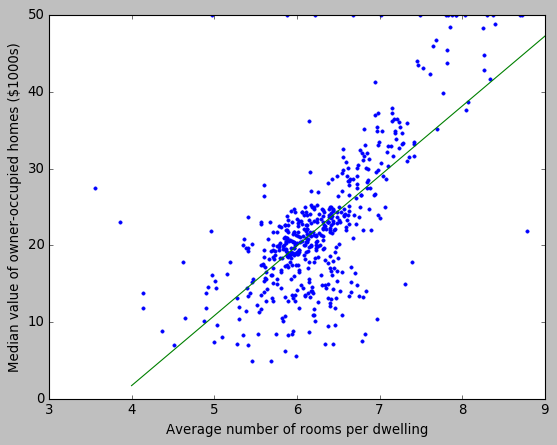

In [12]:
plt.figure(figsize = (8, 6))
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes ($1000s)');

[m,c] = np.polyfit(df['rm'], df['medv'], 1)
x = np.arange(4, 10)
y = m*x +c
plt.plot(df['rm'], df['medv'], '.')
plt.plot(x, y);

## Other investigations

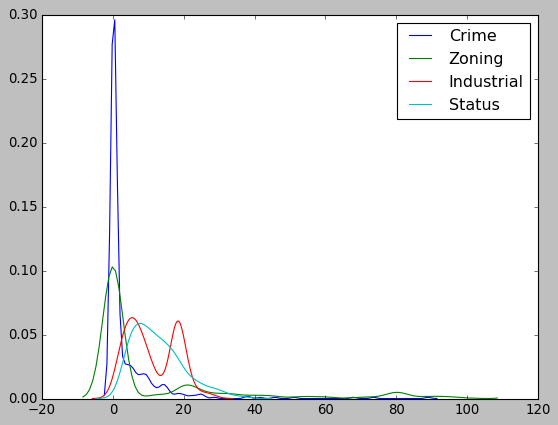

In [18]:
f, ax = plt.subplots()
ax = sns.distplot(df['crim'], ax=ax,
             hist=False, label ='Crime');

sns.distplot(df['zn'], ax=ax,
             hist=False, label ='Zoning');
sns.distplot(df['indus'], ax=ax,
             hist=False, label ='Industrial');
sns.distplot(df['lstat'], ax=ax,
             hist=False, label ='Status');
ax.legend()
ax.set_xlabel(None);

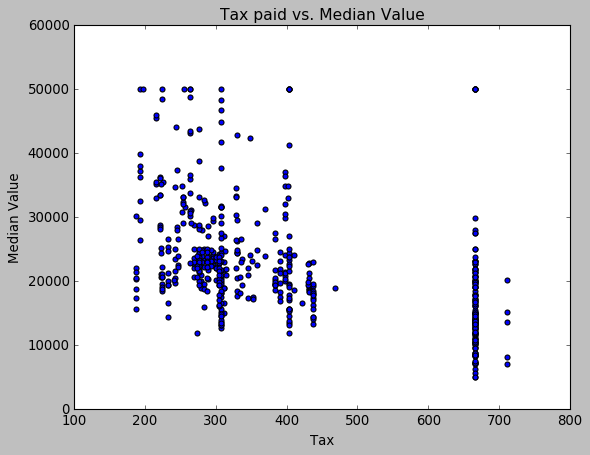

In [19]:
tax = df['tax']
value = df['medv']*1000
plt.title('Tax paid vs. Median Value', fontsize = 14)
plt.xlabel('Tax')
plt.ylabel('Median Value')
plt.scatter(tax, value);